## BeaconRL - A Consensus Layer Gym Environment 

Our goal for this preliminary gym environment is to integrate our existing radCAD simulation environment with OpenAI's gym framework, such that an RL agent will be able to take an action that affects the state of the simulation at each timestep. 

### radCAD + Reinforcement Learning

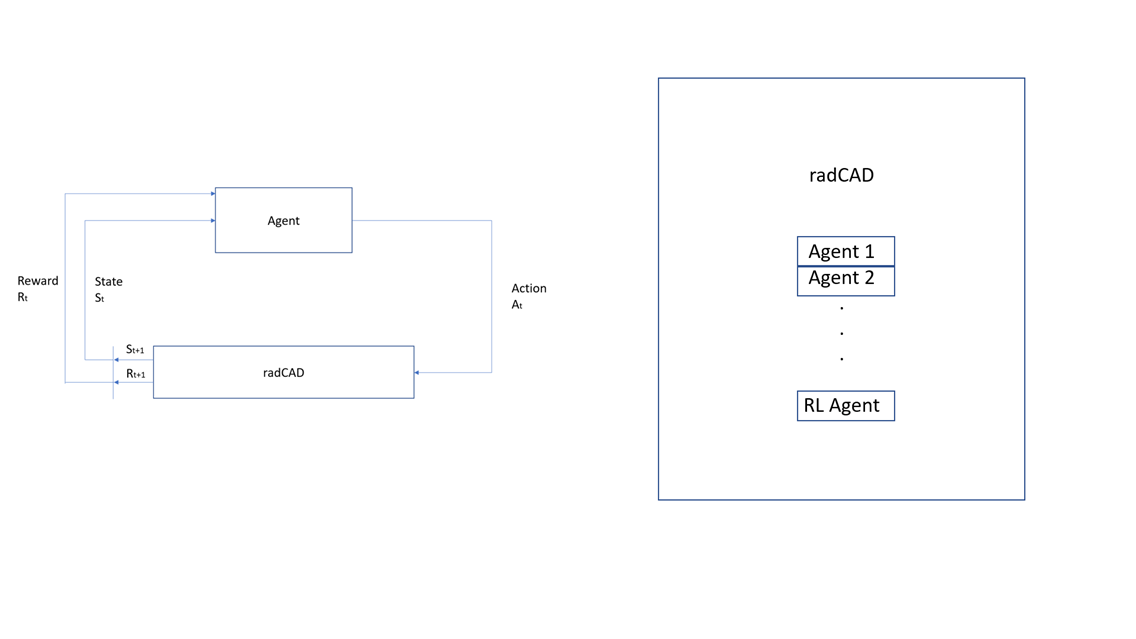

The way the existing setup works is as follows. For each timestep:

- The RL Agent takes an action 
- The action is inputted to the simulation as one of the parameters 
- The simulation moves by one timestep
- The rules of the agent based simulation are programmed in such a way that the behaviour of only one of the agents depends on the value of this parameter (Eg. The agent takes an action A, only if the value of this parmeter = 0) 
- At the end of the timestep, the simulation outputs its current state and that particular agent's reward balance  and is read by the agent as its observation and reward

Currently, each time the agent takes an action, 1 epoch (12 slots) are simulated based on the action taken by the agent

### Actions, Observations and Rewards

Our current choice of actions, observations and rewards can be summarized in the table below

| Item  | Modelling | Description |
| --------------- | --------------- | --------------- |
| **Action Space** |`spaces.Box(np.array([0]),np.array([12]))`| The action space currently consists of one action - The time at which the agent releases the block it proposes. </br> </br> In PoS Ethereum, validators get rewarded for proposing blocks that eventually get included in the beaconchain. However, the probability of a proposer’s block being included on-chain depends on the time at which the block was released. </br> </br> We therefore allow the RL agent to decide when exactly they would release their block during the slot at which they are called to propose one. The lower bound is set to 0, and the upper bound is set to 12 which precisely captures the length of a single slot. </br> </br> Therefore, if an agent takes an action - 4, it means that they would release their block 4 seconds into the slot for which they are called to propose in that epoch. 
|
| **Observation Space** | `spaces.Box(np.array([0]),np.array([12]))` | We simply return the action that the agent takes in the previous timestep as the observation to the agent. This is because, deciding when to release a block is independent of the state of the beaconchain, and therefore the state of the simulation
 |
| **Rewards** | `current_balance - self.balance` | According to the PoS specs, validators get rewarded for carrying out their responsibilities perfectly. A validator can get the highest reward for an epoch when they propose a block that gets added to the chain when they are called to do so. </br> </br> To capture real life incentives as accurately as possible, we simply subtract the validator’s balance in the current timestep from the validator’s balance in the previous timestep which is indicative of the rewards they earned by carrying out their duties in the last epoch. 


Let us now import our gym environment and test it! 

### Housekeeping

In [1]:
import os, sys
sys.path.append("./beaconrunner")

import numpy as np
import pandas as pd

import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

from experiments.run import run
import experiments.templates.rl.experiment as rl_experiment

c:\users\shyam\documents\github\beaconrunnerv2\env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### Testing the environment with Stable Baselines

In [2]:
from stable_baselines3.common.env_checker import check_env
env = rl_experiment.beacon_env
check_env(env)

c:\users\shyam\documents\github\beaconrunnerv2\env\lib\site-packages\stable_baselines3\common\env_checker.py:272: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(
c:\users\shyam\documents\github\beaconrunnerv2\env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


8 proposing block for slot 1
11 proposing block for slot 2
7 proposing block for slot 3
6 proposing block for slot 4
4 proposing block for slot 5
3 proposing block for slot 6
7 proposing block for slot 7
5 proposing block for slot 8
2 proposing block for slot 9
timestep 100 of run 1
2 proposing block for slot 10
4 proposing block for slot 11


### Taking it for a spin!

In [3]:
obs = env.reset()
# env.render()

n_steps = 20
for step in range(n_steps):
    print("Step {}".format(step + 1))
    obs, reward, done, info = env.step(env.action_space.sample())
    print('obs=', obs, 'reward=', reward, 'done=', done)
    env.render()
    if done:
        print("End of simulation!")
        break

Step 1
8 proposing block for slot 1
obs= [8.288712] reward= 0.0 done= False
Step 2
11 proposing block for slot 2
obs= [1.510355] reward= 1239345 done= False
Step 3
7 proposing block for slot 3
obs= [11.095332] reward= 0 done= False
Step 4
6 proposing block for slot 4
obs= [2.0725167] reward= 0 done= False
Step 5
4 proposing block for slot 5
obs= [11.697441] reward= 0 done= False
Step 6
3 proposing block for slot 6
obs= [10.871921] reward= 0 done= False
Step 7
7 proposing block for slot 7
obs= [10.556034] reward= 0 done= False
Step 8
5 proposing block for slot 8
obs= [8.424196] reward= 2091398 done= False
Step 9
2 proposing block for slot 9
timestep 100 of run 1
obs= [5.206076] reward= 0 done= False
Step 10
2 proposing block for slot 10
obs= [6.622622] reward= 0 done= False
Step 11
4 proposing block for slot 11
obs= [5.8914757] reward= 0 done= False
Step 12
10 proposing block for slot 12
obs= [6.5638275] reward= 2788533 done= False
Step 13
4 proposing block for slot 13
obs= [5.2483006] 

### Next steps

We are currently actively pursuing the following directions:

- We aim to evaluvate whether or not an RL based framework can be used to identify potential attacks at an incentives level. We wish to begin by evaluvating whether we can use RL to train an agent to carry out the Ex-Ante reorg attack described in [1].
    - We are therefore working on expanding the action space of our environment to include decisions such as which parent block the agent will build on 
    
- Wr are also working on a new approach of training the agent in an abstracted, smaller scale environment thereby reducing the amount of computational resources needed to train the agent. 

### References

[1] Schwarz-Schilling, C., Neu, J., Monnot, B., Asgaonkar, A., Tas, E. N., & Tse, D. (2021). Three Attacks on Proof-of-Stake Ethereum. arXiv preprint arXiv:2110.10086.
